<a href="https://colab.research.google.com/github/kurtzmaclure/AluraBootCamp/blob/main/BootCampAlura_AULA02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EXPLORAÇÃO DE DADOS - DataSUS 2008 - 2020



---


## **SUMÁRIO**

O DATASUS disponibiliza informações que podem servir para subsidiar análises objetivas da situação sanitária, tomadas de decisão baseadas em evidências e elaboração de programas de ações de saúde.

* **Fontes:** 
  *   [DATASUS](https://datasus.saude.gov.br/informacoes-de-saude-tabnet/)
  *   [TABNET](http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def )
* **Data:** 2021-05-18
* **Arquivos:**
  * [file01](https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A151346189_28_143_208.csv) - utilizado no módulo 01
  * [file02](https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv) - utilizado no módulo 02


---









## **MÓDULO 02 - Primeiras Visualizações de Dados[texto do link](https://)**

### ***REVISÃO MÓDULO 01***

#### Importando Dependências

In [2]:
import pandas as pd
import io
import requests

#### Carregando Dataset

In [3]:
url = "https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv"
s = requests.get(url).content
#dados = pd.read_csv(io.StringIO(s.decode('utf-8')))
dados = pd.read_csv(url, 
                    encoding="ISO-8859-1",
                    skiprows = 3,
                    sep=";",
                    skipfooter=12,
                    engine='python', 
                    thousands=".", 
                    decimal=",")

#### Manipulando Dados 1

Aqui não temos nada diferente em relação ao módulo 01, a não ser a carga de um novo dataset.

In [4]:
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,9.291297e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,4.206680e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1.771655e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,3.050109e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4.437116e+09


In [5]:
dados.tail()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,93172414.99,94415257.59,94228158.01,86424773.65,91598179.14,85793700.48,82737574.48,91825671.54,77582012.38,91078325.19,91926773.80,91678131.98,90989887.85,94861008.10,96799643.23,87344269.09,97371100.06,90190767.67,81748880.30,92467100.02,85301000.44,91624338.70,92787953.22,99117643.75,95840509.87,1.030282e+08,98546110.10,94369189.80,96913904.71,90971809.22,88720873.59,97474362.62,85451646.35,84651396.59,76294596.96,86076113.42,89019478.82,78929703.81,28349257.38,1.195865e+10
23,50 Mato Grosso do Sul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,16323017.60,16892566.36,17019787.73,15808304.19,16071645.95,15687000.65,15040368.93,16146431.63,14703494.87,16969878.14,17062906.92,17068192.56,17143032.30,17435039.90,18239321.45,16963131.37,17677185.62,16363926.26,16149109.15,16902636.63,16964757.79,17259392.23,18147562.63,19143242.28,17905638.97,1.812695e+07,19217982.14,18904364.43,18812185.96,18316480.80,17844511.04,18653296.92,17769247.00,17357008.80,15652772.51,16703851.10,15838659.34,12508717.35,4059220.22,2.172158e+09
24,51 Mato Grosso,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,16194037.75,16508402.55,16749377.27,15416292.84,16251545.59,14659894.99,14473688.30,15578896.35,14592428.67,17252931.32,15921801.14,16732272.17,16075073.71,16479008.11,16011187.69,15357273.96,16834151.93,15474405.82,14234942.30,15055383.98,14478906.98,15976701.25,16026760.63,17304334.81,16131820.19,1.646780e+07,16532335.42,15596133.69,16514764.99,15097362.41,13827706.20,15445693.74,14431171.87,14444207.60,11943713.53,13981483.29,14585009.42,13083151.70,6174224.99,2.036924e+09
25,52 Goiás,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33663853.68,33958341.89,36899367.18,32721458.05,35621496.15,32535396.77,32332573.53,33702293.07,30923462.58,34861711.53,33764503.14,36357757.30,33492211.73,35313884.40,35380148.68,33780632.05,35990491.96,34862475.74,34050646.02,34795831.02,33279088.23,34951022.38,36207403.69,37750841.56,35372150.57,3.647362e+07,38399592.70,36335534.96,37171427.64,36234132.35,34050298.55,36312121.02,34158023.81,34558308.52,27499307.93,31870107.62,34437633.20,33499284.38,20242641.73,4.657349e+09
26,53 Distrito Federal,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,18573610.32,17541378.12,19143091.84,17949844.52,18200213.74,17409701.46,16038710.79,18976846.56,18389240.38,19746542.97,19508159.58,19463161.26,18400388.35,18783802.78,20291741.30,19388061.07,19677470.12,18397893.23,17564774.75,19662949.33,18270823.61,20046081.24,20602037.52,21101108.01,19361819.39,2.151493e+07,21133361.51,20963621.60,21333585.20,19617400.92,19207148.01,20429067.27,18219172.96,19405446.88,18123899.78,21437430.22,23479773.03,22233542.26,12044848.02,2.429933e+09


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 280 entries, Unidade da Federação to Total
dtypes: float64(157), object(123)
memory usage: 59.2+ KB


In [7]:
dados.mean()

2007/Ago    3.049528e+05
2007/Set    7.881453e+05
2007/Out    2.440163e+06
2007/Nov    5.517354e+06
2007/Dez    1.233716e+07
                ...     
2020/Abr    4.000568e+07
2020/Mai    4.676903e+07
2020/Jun    4.536735e+07
2020/Jul    4.071708e+07
Total       5.993724e+09
Length: 157, dtype: float64

In [8]:
pd.options.display.float_format = "{:.2f}".format

In [9]:
dados.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Abr     40005678.92
2020/Mai     46769027.82
2020/Jun     45367349.74
2020/Jul     40717083.95
Total      5993724452.01
Length: 157, dtype: float64

In [10]:
dados['2008/Ago']

0      2938286.29
1      1886871.84
2      8331763.97
3      1045291.11
4     23259148.28
5      1550340.63
6      5213290.38
7     14609872.57
8     10645917.52
9     29304821.51
10    10812840.19
11    12673774.35
12    31705296.79
13     9262767.68
14     4543252.50
15    43254543.33
16    80374117.08
17    12384068.19
18    42487939.51
19   179898070.22
20    56699001.13
21    28887854.62
22    56233758.74
23     9602843.49
24     8987811.95
25    21041071.33
26    11548451.89
Name: 2008/Ago, dtype: float64

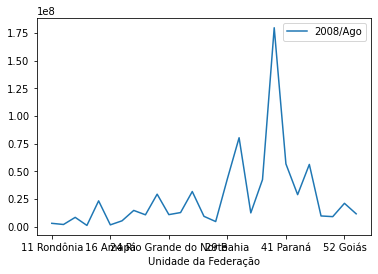

In [11]:
dados.plot(x='Unidade da Federação', y='2008/Ago') # ficou estranho

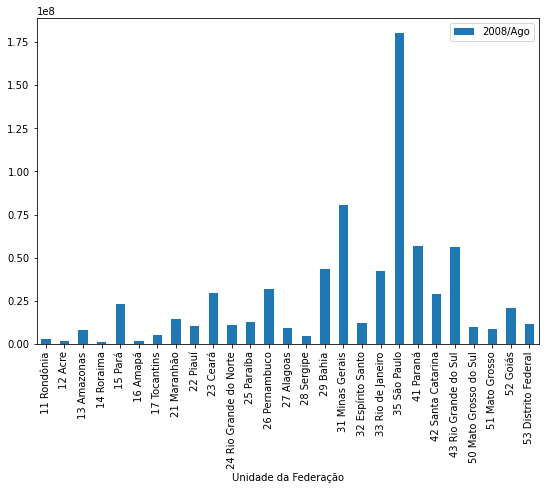

In [12]:
dados.plot(x='Unidade da Federação', y='2008/Ago', kind="bar", figsize=(9,6))

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 



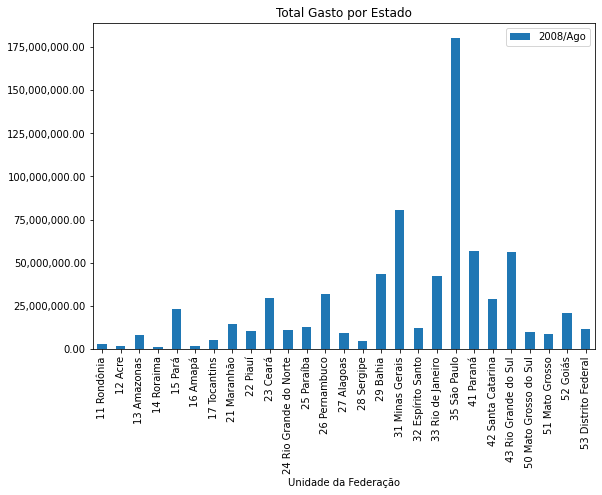

In [14]:
ax = dados.plot(x='Unidade da Federação', y='2008/Ago', kind="bar", figsize=(9,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) # alterando os ticks do grafico
plt.title("Total Gasto por Estado")
plt.show()

####**DESAFIOS - MODULO 01:**

1. Escolher um título mais descritivo, que passe a mensagem adequada
2. Fazer a mesma análise para o mês mais recente







In [15]:
dados.replace(['-'],[0], inplace=True)

In [16]:
dados_formatados = dados['2020/Ago'].astype(float)

In [17]:
dados_formatados

0      3556381.57
1            0.00
2      4726485.73
3      1524478.04
4     11559714.54
5       834187.31
6      2453362.74
7     10916718.78
8      7926321.69
9     14559529.59
10     8080160.97
11     8585226.08
12    33544876.14
13     6487947.82
14     1742127.72
15    26023558.53
16    57473699.06
17    10824255.26
18    36264322.65
19   140414944.95
20    41542401.16
21    16991236.43
22    28349257.38
23     4059220.22
24     6174224.99
25    20242641.73
26    12044848.02
Name: 2020/Ago, dtype: float64

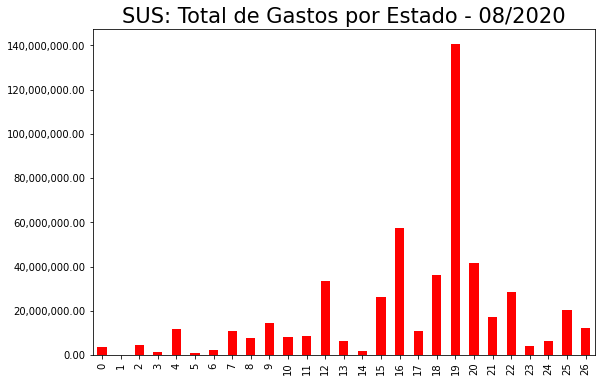

In [18]:
ax = dados_formatados.plot(x='Unidade da Federação', y=('2020/Ago'), kind="bar", figsize=(9,6), color='red')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("SUS: Total de Gastos por Estado - 08/2020", fontsize=21)
plt.show()

### **MODULO 02 - INICIO**

#### **Manipulando nossos dados**

In [19]:
# COMENTÁRIO
'''
Aqui tiramos as médias para dois meses distintos
'''
dados[['2008/Ago','2008/Set']].mean()

2008/Ago   26636409.89
2008/Set   27049886.85
dtype: float64

In [42]:
dados[['2008/Ago','2008/Set']].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


In [20]:
# COMENTÁRIO
'''
Impressão dos indícies das nossas médias, pois a média ignora colunas sem valores.
'''
dados.mean().index

Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2019/Nov', '2019/Dez', '2020/Jan', '2020/Fev', '2020/Mar', '2020/Abr',
       '2020/Mai', '2020/Jun', '2020/Jul', 'Total'],
      dtype='object', length=157)

In [43]:
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,0,420668039.63
2,13 Amazonas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71


##### Inserindo a coluna Estados da Federação na POSIÇÃO ZERO

In [21]:
# COMENTÁRIO
'''
Queremos apenas as colunas que possuem dados válidos, por isso usamos a média para ignorar, mas tambem queremos que nosso ídicie
sejam os Estados da Federação
'''
colunas_usaveis = dados.mean().index
colunas_usaveis.insert(0,"Unidade da Federação")
## Não consegui inserir, pois é preciso transformar em lista, o que faremos abaixo
colunas_usaveis[0]

'2007/Ago'

In [22]:
colunas_usaveis = dados.mean().index.tolist() ## É necessário converter em lista para realizar um insert
colunas_usaveis.insert(0,"Unidade da Federação")
#colunas_usaveis.remove("Total")
colunas_usaveis[0]
#colunas_usaveis

'Unidade da Federação'

In [23]:
colunas_usaveis[:10]

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr']

In [24]:
# COMENTÁRIO
'''
Tudo certo, já temos as colunas usáveis e a coluna "Estados da Federação"
na posição em que queremos,  mas ainda precisamos que nosso indicie sejam os Estados,
e isso precisa ser setado 
'''
dados[colunas_usaveis].head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161

In [25]:
usaveis = dados[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161

##### **Definindo nosso índicie**

In [26]:
usaveis = usaveis.set_index("Unidade da Federação")
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,26

In [27]:
#COMENTÁRIO
'''
Agora conseguimos pegar as médias tendo como indicies os Estados.
'''
usaveis["2019/Ago"]

Unidade da Federação
11 Rondônia                8909111.89
12 Acre                    2981072.98
13 Amazonas               16493719.52
14 Roraima                 3181321.82
15 Pará                   36462011.47
16 Amapá                   2173060.89
17 Tocantins               7140062.79
21 Maranhão               31374191.37
22 Piauí                  17816404.11
23 Ceará                  51672585.01
24 Rio Grande do Norte    23073307.72
25 Paraíba                19854699.54
26 Pernambuco             71735626.96
27 Alagoas                17668105.59
28 Sergipe                10075280.52
29 Bahia                  77852441.31
31 Minas Gerais          161707825.05
32 Espírito Santo         29298721.79
33 Rio de Janeiro         83311603.59
35 São Paulo             302367276.77
41 Paraná                127174095.05
42 Santa Catarina         64503540.72
43 Rio Grande do Sul      98546110.10
50 Mato Grosso do Sul     19217982.14
51 Mato Grosso            16532335.42
52 Goiás                  383

In [28]:
usaveis.loc["12 Acre"] # a linha cujo indicie é Acre

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2020/Abr     2472063.08
2020/Mai     2383895.48
2020/Jun     2199920.70
2020/Jul     1163813.08
Total      420668039.63
Name: 12 Acre, Length: 157, dtype: float64

##### Transpondo eixos

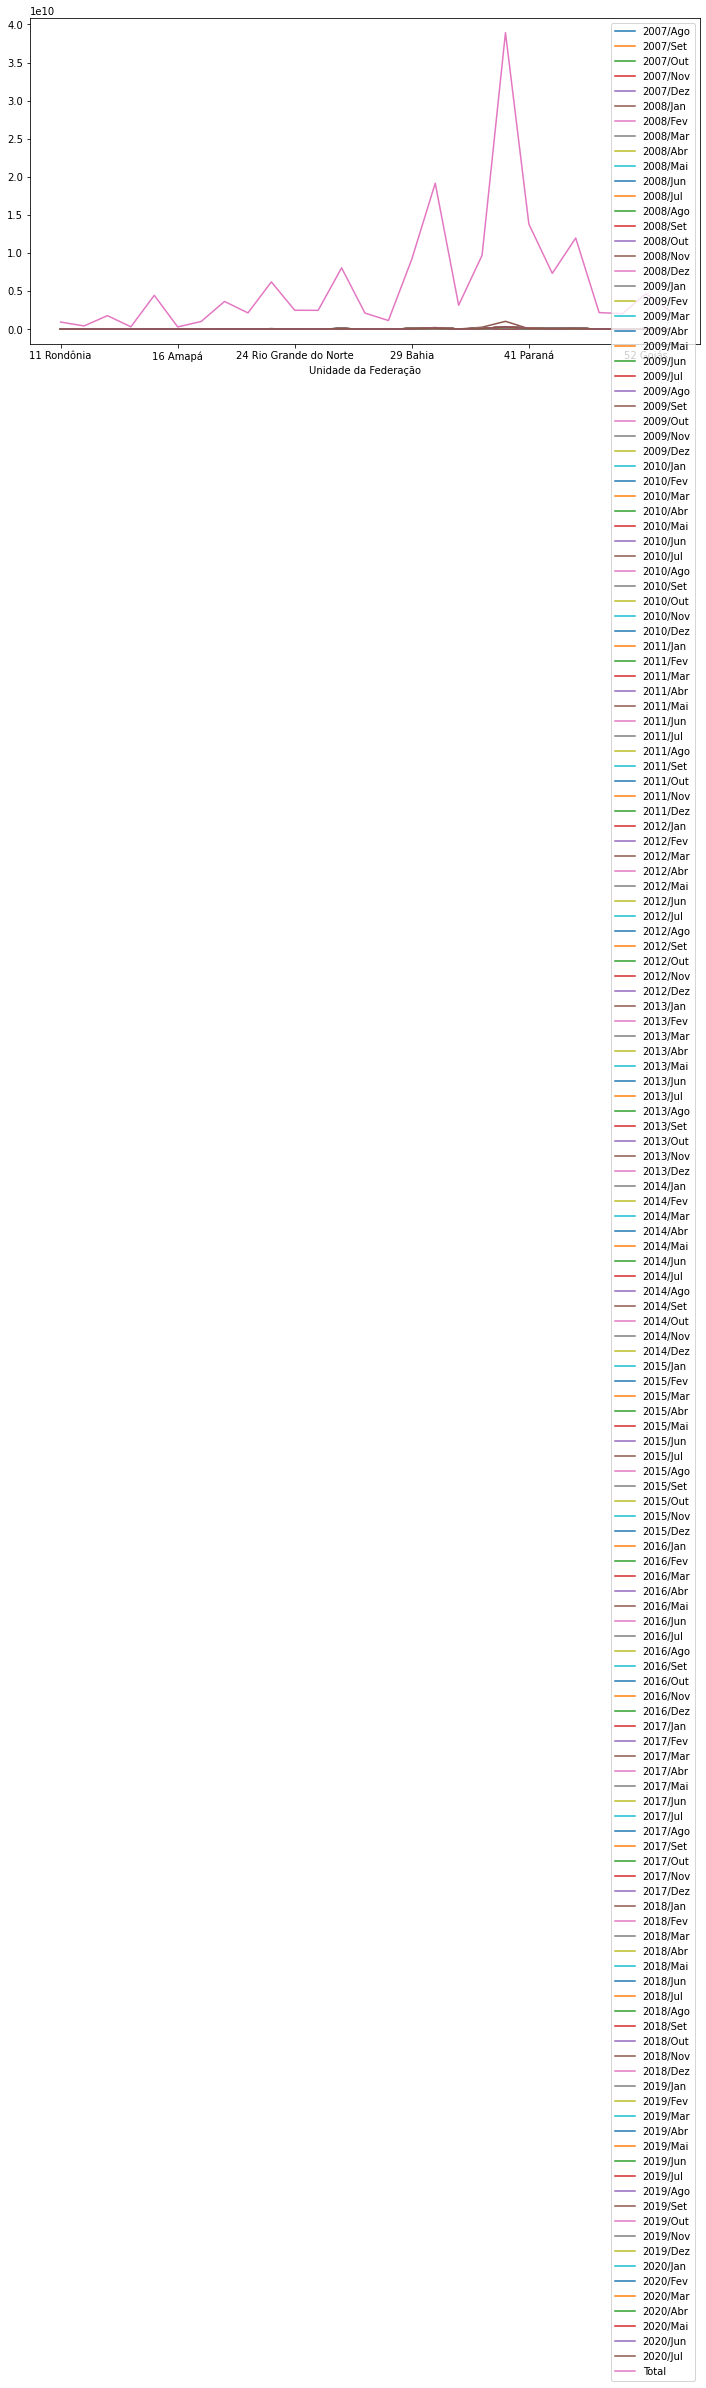

In [29]:
#COMENTÁRIO
'''
 Á Consigo plotar um gráfico, mas é preciso TRANSPOR meus eixos, o que faremos na célula a seguir
'''
usaveis.plot(figsize=(12,6))

In [30]:
#COMENTÁRIO
'''
Para TRANSPOR, uso o T (TROCO X por Y)
'''
usaveis.T.head() 

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,134605.36,97352.78,400640.85,104243.75,27453.63,135146.36,971394.37,57408.11,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,272088.08,368130.43,1088340.42,174024.90,78565.19,448349.75,2861781.50,284224.80,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,684678.30,1002088.64,2973553.48,595544.54,122952.94,1382038.11,10018011.35,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,1695824.89,2149873.40,6699828.82,1125396.73,775705.52,3348779.62,21730281.63,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,4730811.68,5448177.36,16919031.39,2564966.65,2765495.63,11948984.56,43429517.54,5724199.54,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42


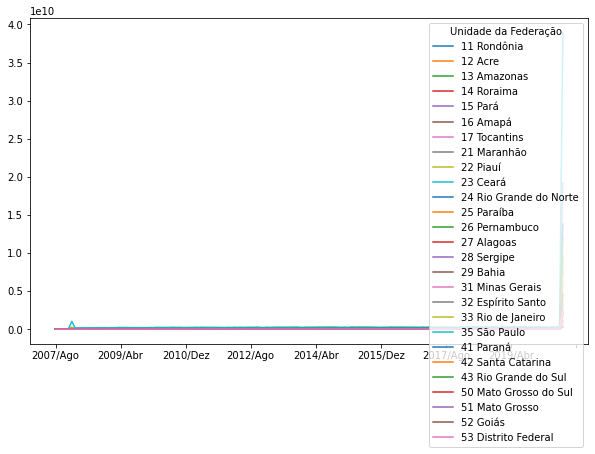

In [31]:
usaveis.T.plot(figsize=(10,6))

##### Removendo uma linha 

In [32]:
# COMENTÁRIO
'''
Mas ainda há algo errado, precisamos remover a linha TOTAL
'''
usaveis = usaveis.drop("Total", axis= 1)

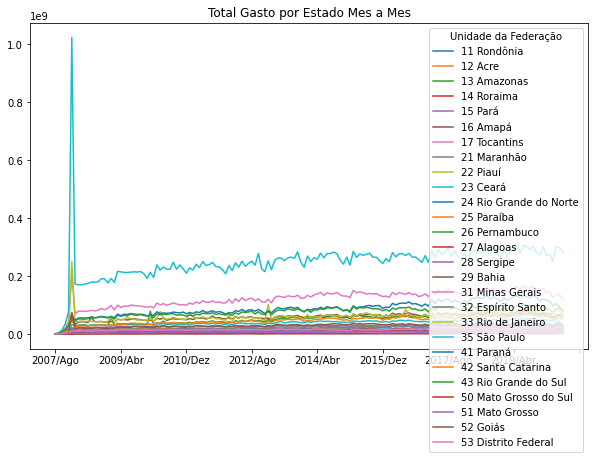

In [33]:
usaveis.T.plot(figsize=(10,6))
plt.title("Total Gasto por Estado Mes a Mes")
plt.show()

#### DESAFIO 01

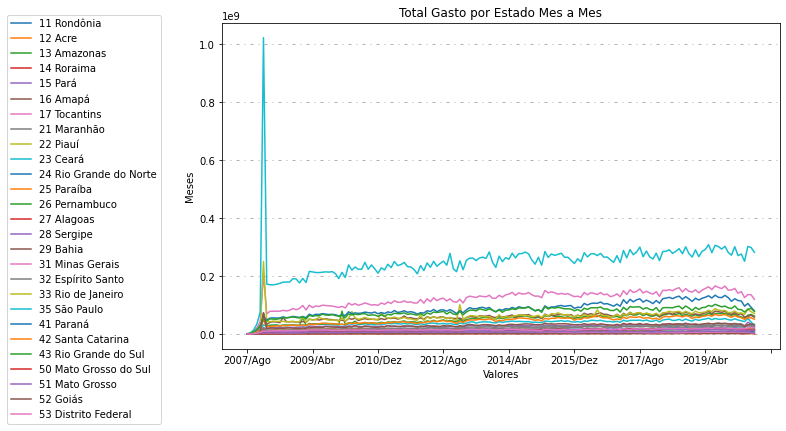

In [34]:
#SEPARAR A TABELA DA LEGENDA

usaveis.T.plot(figsize=(10,6))
plt.title("Total Gasto por Estado Mes a Mes")

plt.xlabel('Valores') #definindo nome do eixo X
plt.ylabel('Meses') #definindo nome do eixo Y
plt.legend(loc='upper right', bbox_to_anchor=(-0.1, 1.04)) #colocando a legenda no melhor lugar
plt.style.use('classic')
axes = plt.gca()
axes.yaxis.grid(b=True, color='black', alpha=0.3, linestyle='-.', linewidth=1)
plt.show()

#### DESAFIO 02

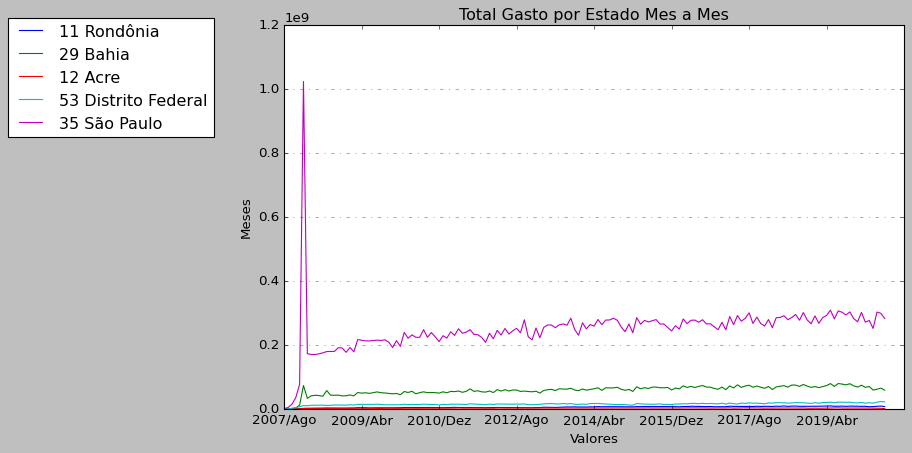

In [35]:
#PLOTAR 5 ESTADOS SEPARADOS
estados = ['11 Rondônia','29 Bahia','12 Acre', '53 Distrito Federal', '35 São Paulo']
usaveis.T[estados].plot(figsize=(10,6))
plt.title("Total Gasto por Estado Mes a Mes")

plt.xlabel('Valores') #definindo nome do eixo X
plt.ylabel('Meses') #definindo nome do eixo Y
plt.legend(loc='upper right', bbox_to_anchor=(-0.1, 1.04)) #colocando a legenda no melhor lugar
plt.style.use('classic')
axes = plt.gca()
axes.yaxis.grid(b=True, color='black', alpha=0.3, linestyle='-.', linewidth=1)
plt.show()

#### PLAYGROUND

In [47]:

for colunas in colunas_usaveis:
  print(colunas)

Unidade da Federação
2007/Ago
2007/Set
2007/Out
2007/Nov
2007/Dez
2008/Jan
2008/Fev
2008/Mar
2008/Abr
2008/Mai
2008/Jun
2008/Jul
2008/Ago
2008/Set
2008/Out
2008/Nov
2008/Dez
2009/Jan
2009/Fev
2009/Mar
2009/Abr
2009/Mai
2009/Jun
2009/Jul
2009/Ago
2009/Set
2009/Out
2009/Nov
2009/Dez
2010/Jan
2010/Fev
2010/Mar
2010/Abr
2010/Mai
2010/Jun
2010/Jul
2010/Ago
2010/Set
2010/Out
2010/Nov
2010/Dez
2011/Jan
2011/Fev
2011/Mar
2011/Abr
2011/Mai
2011/Jun
2011/Jul
2011/Ago
2011/Set
2011/Out
2011/Nov
2011/Dez
2012/Jan
2012/Fev
2012/Mar
2012/Abr
2012/Mai
2012/Jun
2012/Jul
2012/Ago
2012/Set
2012/Out
2012/Nov
2012/Dez
2013/Jan
2013/Fev
2013/Mar
2013/Abr
2013/Mai
2013/Jun
2013/Jul
2013/Ago
2013/Set
2013/Out
2013/Nov
2013/Dez
2014/Jan
2014/Fev
2014/Mar
2014/Abr
2014/Mai
2014/Jun
2014/Jul
2014/Ago
2014/Set
2014/Out
2014/Nov
2014/Dez
2015/Jan
2015/Fev
2015/Mar
2015/Abr
2015/Mai
2015/Jun
2015/Jul
2015/Ago
2015/Set
2015/Out
2015/Nov
2015/Dez
2016/Jan
2016/Fev
2016/Mar
2016/Abr
2016/Mai
2016/Jun
2016/Jul
2016/Ag

In [62]:
total = colunas_usaveis
len(total)
total

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',
